In [1]:
!pip install -U keras
!pip install -U tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.1 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires keras<2.9,>=2.8.0rc0, but you have keras 2.10.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 18 kB/s 
     |████████████████████████████████| 438 kB 38.1 MB/s 
     |████████████████████████████████| 5.9 MB 35.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensor

In [6]:
import nltk
import pandas as pd
import re
import numpy as np
import math
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv1D,Embedding,BatchNormalization,GlobalMaxPooling1D,MaxPooling1D,Dropout,Conv2D,Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from keras.utils.np_utils import to_categorical
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import pad_sequences

In [45]:
data = 'https://raw.githubusercontent.com/Tong00020/Tweets---NLP/main/output.csv?token=GHSAT0AAAAAABRE3CEZGWX3JE7JMNLNYLBUYZKMCHQ'

In [59]:
df_train = pd.read_csv(data, names=["id","tweets","tweet_sentiment_value"])
df_train

,id,tweets,tweet_sentiment_value
NaN,id,tweets,tweet_sentiment_value
0.0,595e60b48fcd022a715f7b7b,this airfrance ber oldest ifes ive ever seen b...,0
1.0,595e60de8fcd022a715f7b7d,will miss connection airfrance,0
2.0,595e61448fcd022a715f7b7f,airfrance lost luggage overhead cabin email re...,0
3.0,595e62748fcd022a715f7b83,heres twist all airlines hate musicians saga g...,0
...,...,...,...
1092.0,596b9c77976f440300c0f913,airfrance thanks rome,2
1093.0,596be744976f440300c0f9b7,rakiichak flying wrong airline france sensational,2
1094.0,596c5d0f976f440300c0fac6,kislanykim airfrance similar experience with t...,2
1095.0,596c9962976f440300c0fc90,nothing tops when check france music selection...,2


In [ ]:
df_train.drop(labels=['id'],axis=1)

In [62]:
print(f"Training has {df_train.shape} tweets")

Training has (1098, 3) tweets


In [63]:
X = df_train['tweets']
Y = df_train['tweet_sentiment_value']

In [67]:
X = X[0:]
Y = Y[0:]
df_train['tweets'] = X
df_train['tweet_sentiment_value'] = Y

In [157]:
df_train = df_train[0:]
df_train

,id,tweets,tweet_sentiment_value
0.0,595e60b48fcd022a715f7b7b,this airfrance ber oldest ifes ive ever seen b...,0
1.0,595e60de8fcd022a715f7b7d,will miss connection airfrance,0
2.0,595e61448fcd022a715f7b7f,airfrance lost luggage overhead cabin email re...,0
3.0,595e62748fcd022a715f7b83,heres twist all airlines hate musicians saga g...,0
4.0,595e62b28fcd022a715f7b86,airfrance might have pieces most important gea...,0
...,...,...,...
1092.0,596b9c77976f440300c0f913,airfrance thanks rome,2
1093.0,596be744976f440300c0f9b7,rakiichak flying wrong airline france sensational,2
1094.0,596c5d0f976f440300c0fac6,kislanykim airfrance similar experience with t...,2
1095.0,596c9962976f440300c0fc90,nothing tops when check france music selection...,2


In [158]:
df_text_s = df_train[['tweets', 'tweet_sentiment_value']]

In [159]:
train, test = train_test_split(df_text_s, test_size=0.2)
validation, test = train_test_split(test, test_size=0.6)

In [163]:
train['tweet_sentiment_value'] = pd.Categorical(train['tweet_sentiment_value'])
y_train_int = train['tweet_sentiment_value'].cat.codes

validation['tweet_sentiment_value'] = pd.Categorical(validation['tweet_sentiment_value'])
y_valid_int = validation['tweet_sentiment_value'].cat.codes

test['tweet_sentiment_value'] = pd.Categorical(test['tweet_sentiment_value'])
y_test_int = test['tweet_sentiment_value'].cat.codes

In [164]:
y_train = to_categorical(y_train_int)
y_valid = to_categorical(y_valid_int)
y_test = to_categorical(y_test_int)

In [166]:
to_train = train['tweets'].to_list()
to_valid = validation['tweets'].to_list()
to_test = test['tweets'].to_list()

vocabulary = {}
vocabulary_valid = {}
vocabulary_test = {}

for i in range(0,len(to_train)):
      for word in to_train[i].split():
          if word not in vocabulary:
              vocabulary[word] = 1
          else:
              vocabulary[word]+=1

for i in range(0,len(to_valid)):
    to_valid[i] = to_valid[i].lower()
    for word in to_valid[i].split():
        if word not in vocabulary_valid:
            vocabulary_valid[word] = 1
        else:
            vocabulary_valid[word]+=1

for i in range(0,len(to_test)):
    to_test[i] = to_test[i].lower()
    for word in to_test[i].split():
        if word not in vocabulary_test:
            vocabulary_test[word] = 1
        else:
            vocabulary_test[word]+=1

In [167]:
vocab_size = len(vocabulary)
vocab_size_valid = len(vocabulary_valid)
vocab_size_test = len(vocabulary_test)

tokenizer = Tokenizer(num_words = vocab_size,lower=True)
tokenizer_valid = Tokenizer(num_words = vocab_size_valid,lower=True)
tokenizer_test = Tokenizer(num_words = vocab_size_test,lower=True)

tokenizer.fit_on_texts(train['tweets'])
train_sequences = tokenizer.texts_to_sequences(train['tweets'])

tokenizer.fit_on_texts(validation['tweets'])
valid_sequences = tokenizer.texts_to_sequences(validation['tweets'])

tokenizer.fit_on_texts(test['tweets'])
test_sequences = tokenizer.texts_to_sequences(test['tweets'])

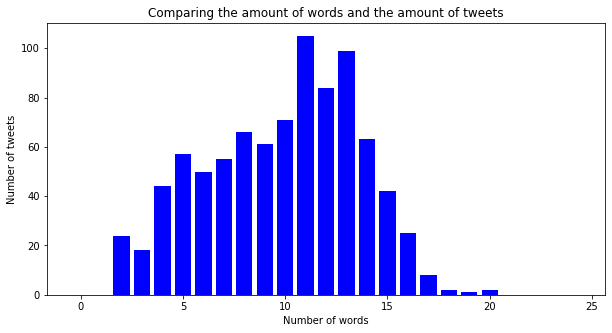

In [168]:
aux = 25
hist = {}
hist['qtde'] = [i for i in range(0,aux)]

lista = [0]*(aux)
for i in train_sequences:
    lista[len(i)]+=1

hist['tweets'] = lista
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(hist['qtde'],hist['tweets'],
        color ='blue')
 
plt.xlabel("Number of words")
plt.ylabel("Number of tweets")
plt.title("Comparing the amount of words and the amount of tweets")
plt.show()

In [171]:
max_len = 21
n = 32
train_padded = pad_sequences(train_sequences,maxlen=max_len,padding='post',truncating='post')
valid_padded = pad_sequences(valid_sequences, maxlen=max_len, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

In [172]:
model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = n, input_length=max_len))
model.add(Conv1D(filters=128, kernel_size=11, padding='same',strides=1))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(GlobalMaxPooling1D())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 21, 32)            83136     
                                                                 
 conv1d_1 (Conv1D)           (None, 21, 128)           45184     
                                                                 
 activation_3 (Activation)   (None, 21, 128)           0         
                                                                 
 batch_normalization_1 (Batc  (None, 21, 128)          512       
 hNormalization)                                                 
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 256)              

In [173]:
sgd = SGD(learning_rate=0.00002)
model.compile(loss="categorical_crossentropy",optimizer=sgd,metrics=['accuracy'])
history_fine = model.fit(train_padded, y_train,
                         validation_data=(valid_padded, y_valid),
                         epochs=110, batch_size=32)

Epoch 1/110
28/28 [==============================] - 2s 22ms/step - loss: 1.0607 - accuracy: 0.3843 - val_loss: 1.0915 - val_accuracy: 0.3977
Epoch 2/110
28/28 [==============================] - 0s 12ms/step - loss: 1.0561 - accuracy: 0.3843 - val_loss: 1.0909 - val_accuracy: 0.3636
Epoch 3/110
28/28 [==============================] - 0s 13ms/step - loss: 1.0518 - accuracy: 0.3934 - val_loss: 1.0901 - val_accuracy: 0.4318
Epoch 4/110
28/28 [==============================] - 0s 12ms/step - loss: 1.0481 - accuracy: 0.3957 - val_loss: 1.0892 - val_accuracy: 0.4318
Epoch 5/110
28/28 [==============================] - 0s 12ms/step - loss: 1.0435 - accuracy: 0.4002 - val_loss: 1.0881 - val_accuracy: 0.4205
Epoch 6/110
28/28 [==============================] - 0s 12ms/step - loss: 1.0417 - accuracy: 0.4071 - val_loss: 1.0868 - val_accuracy: 0.4205
Epoch 7/110
28/28 [==============================] - 0s 12ms/step - loss: 1.0380 - accuracy: 0.4139 - val_loss: 1.0853 - val_accuracy: 0.3977
Epoch 

 Validation

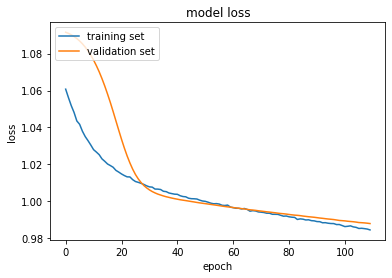

In [174]:
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']


plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

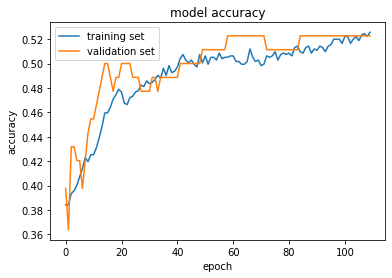

In [175]:
plt.plot(history_fine.history['accuracy'])
plt.plot(history_fine.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

In [180]:
from sklearn.metrics import classification_report

y_prob = model.predict(test_padded)
y_pred = np.argmax(y_prob,axis=1)

5/5 [==============================] - 0s 4ms/step


In [181]:
print(classification_report(y_test_int,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.26      0.34        42
           1       0.55      0.90      0.68        67
           2       0.00      0.00      0.00        23

    accuracy                           0.54       132
   macro avg       0.35      0.39      0.34       132
weighted avg       0.44      0.54      0.45       132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
